<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%204/10_PCA_LDA_Elements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- These examples are partially based on the Sebastian Rashka book, https://subscription.packtpub.com/book/data/9781801819312

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

In [46]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

# Import Atom Dataset

In [47]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 19.9MB/s]


In [48]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


In [49]:
df['Symbol'].values

array([' H', ' He', ' Li', ' Be', ' B', ' C', ' N', ' O', ' F', ' Ne',
       ' Na', ' Mg', ' Al', ' Si', ' P', ' S', ' Cl', ' Ar', ' K', ' Ca',
       ' Sc', ' Ti', ' V', ' Cr', ' Mn', ' Fe', ' Co', ' Ni', ' Cu',
       ' Zn', ' Ga', ' Ge', ' As', ' Se', ' Br', ' Kr', ' Rb', ' Sr',
       ' Y', ' Zr', ' Nb', ' Mo', ' Tc', ' Ru', ' Rh', ' Pd', ' Ag',
       ' Cd', ' In', ' Sn', ' Sb', ' Te', ' I', ' Xe', ' Cs', ' Ba',
       ' La', ' Ce', ' Pr', ' Nd', ' Pm', ' Sm', ' Eu', ' Gd', ' Tb',
       ' Dy', ' Ho', ' Er', ' Tm', ' Yb', ' Lu', ' Hf', ' Ta', ' W',
       ' Re', ' Os', ' Ir', ' Pt', ' Au', ' Hg', ' Tl', ' Pb', ' Bi',
       ' Po'], dtype=object)

In [50]:
# prompt: Create three additional columns in the DataFrame df.
#One column is Alkali and should have values 1 if value of column Symbol is Li, Na, K, Rb, and Cs and 0 otherwise.
#The second should be Alcali Eart and be 1 if Symbol is Be, Ca, Ba, Sr and 0 otherwise.
#Finally, third should be Halogen and be 1 if the Symbol is F, Cl, Br, I, At, and 0 otherwise.

df['Alkali'] = (df['Symbol'].isin([' Li', ' Na', ' K', ' Rb', ' Cs'])).astype(int)
df['Alkali_Earth'] = (df['Symbol'].isin([' Be', ' Ca', ' Ba', ' Sr'])).astype(int)
df['Halogen'] = (df['Symbol'].isin([' F', ' Cl', ' Br', ' I', ' At'])).astype(int)

df2 = df #Let's make a copy for later use

df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States,Alkali,Alkali_Earth,Halogen
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1,0,0,0
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2,0,0,0
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1,1,0,0
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2,0,1,0
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3,0,0,0


# PCA on Elements

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
df.columns

Index(['Symbol', 'Atomic_radius', 'Covalent_radius', 'Density',
       'Pauling_Electronegativity', 'Electron_affinity',
       'First_Ionisation_Energy', 'Heat_Evaporation', 'Melting_Point',
       'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
       'Thermal_Conductivity', 'Max_Oxidation_States', 'Alkali',
       'Alkali_Earth', 'Halogen'],
      dtype='object')

In [53]:
# prompt: Run a PCA analysis on the columns  [''Atomic_radius', 'Covalent_radius', 'Density',
#        'Pauling_Electronegativity', 'Electron_affinity', 'First_Ionisation_Energy',
#        'Heat_Evaporation', 'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
#        'Thermal_Conductivity', 'Max_Oxidation_States']

df_1 = df[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df_1)

pca = PCA(n_components=2)
df_pca_transformed = pca.fit_transform(df_std)

Now, let's do the PCA analysis on the element attributes. We use StandardScaler to account for the difference in units and scales. Then we transform the 13D vector of parameters for each element into 2 PCA components (we choose 2 for conveninece of representation). We also color Alcali metals, Alcali Eart metals, and Halogens by different color. Note that all three form visible group, and Alkali and Alkali Earth are close to each other.  

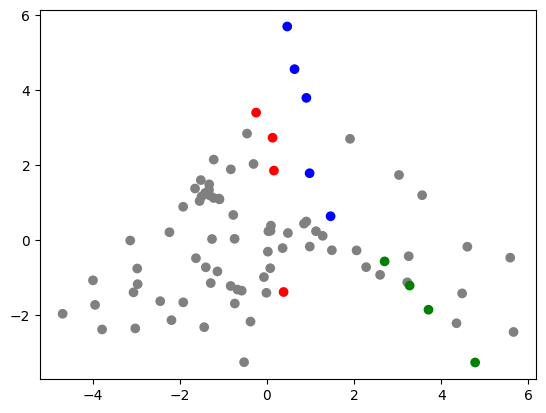

In [54]:
def get_color(row):
    if row['Alkali'] == 1:
        return 'blue'
    elif row['Alkali_Earth'] == 1:
        return 'red'
    elif row['Halogen'] == 1:
        return 'green'
    else:
        return 'gray'

# Apply the function to the dataframe to get a list of colors
colors = df.apply(get_color, axis=1)
plt.scatter(df_pca_transformed[:, 0], df_pca_transformed[:, 1], c = colors)

Now, let's look at the strucutre of the components and see what makes them special.

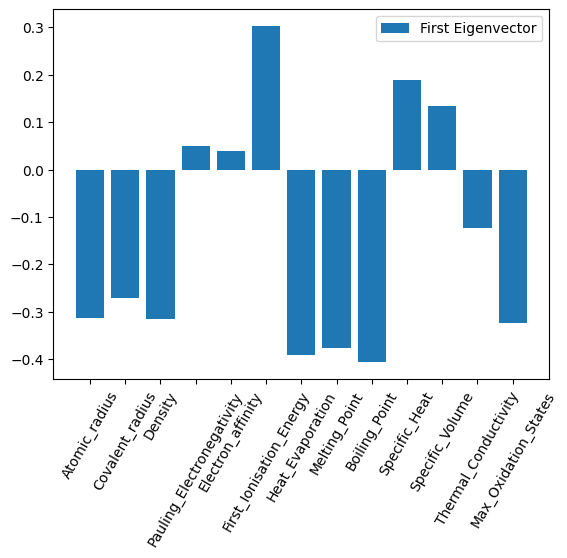

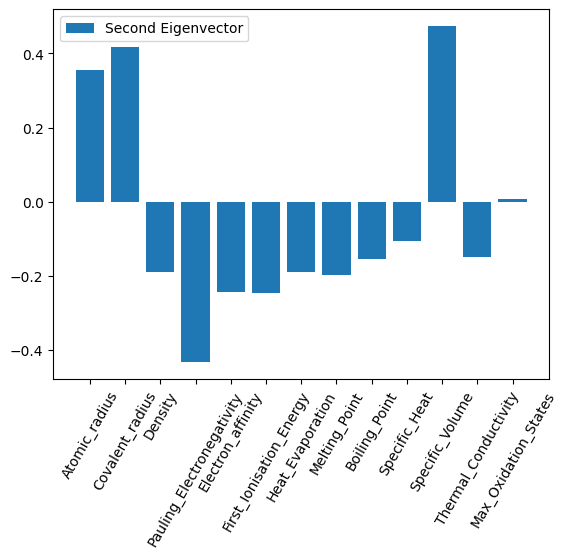

In [55]:
# prompt: Show the first and second eigenvector for PCA as vertical bar plot. Use the labels from df index

eigenvector_values = pca.components_

# Get the labels for the elements, which are the index values of the dataframe
labels = ['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']

# Plot the first and second eigenvector as a bar plot
plt.bar(labels, eigenvector_values[0, :], label='First Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.bar(labels, eigenvector_values[1, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# LDA on Elements

Now, let's run LDA on our elements. We use the DataFrame we have saved in the beginning of the Colab.

In [56]:
df2.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States,Alkali,Alkali_Earth,Halogen
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1,0,0,0
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2,0,0,0
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1,1,0,0
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2,0,1,0
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3,0,0,0


And now we run the LDA analysis.
- Here we use the one-hot encoded vectors for the Alkali and Halogen to create class labels. Now Alkali as Class 1, Halogen as Class 2, and everything else as Class 0.
- Note that the LDA separates the Alkali and Halogen much better - compare to the PCA analysis.
- In the code below, the line 30 can be un-commented. Then you will see where the Alkali Earth metals are in this case (they were **not** a class we have trianed the LDA on).

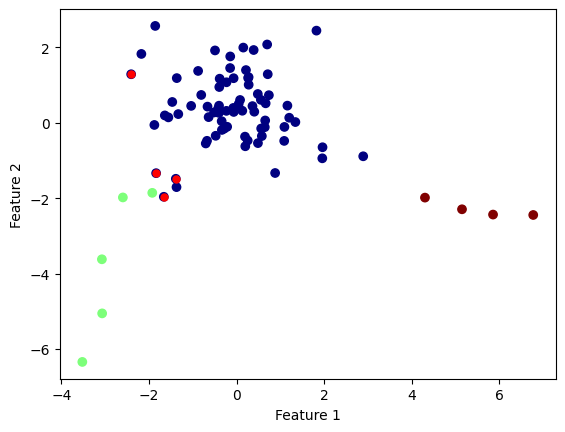

In [57]:
# Import the required libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Create the features and target variables
X = df2[['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']]

y = df2['Alkali'] + 2*df2['Halogen']

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Create the local discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 2)

# Fit the model to the data
lda.fit_transform(X_std, y)

# Predict the labels for the data
y_pred = lda.predict(X_std)
X_t = lda.fit_transform(X_std, y)

# Plot the decision boundary
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap = "jet")

# Show Alkali Earth
plt.scatter(X_t[df2['Alkali_Earth'] == 1, 0], X_t[df2['Alkali_Earth'] == 1, 1], c = 'red', s = 25, marker='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We can also explore the outputs of the LDA model. Here, the key parameters are *coef_* and *scalings_*:

1. *coef_*:
- What it is: The coef_ attribute contains the coefficients of the linear decision boundary.
- Role in LDA: Used to make predictions.
- ize: If you're working with a binary classification problem, coef_ is a one-dimensional array. For multi-class classification, it's a 2D array, with one row for each class.
- For binary classification, the sign of the dot product of coef_ with an input feature vector determines the class of the input.
- For multi-class, the class with the highest dot product value is chosen.

2. *scalings_*:
- What it is: The scalings_ attribute contains the scaling factors (or weights) for the features used in the linear transformation to the lower-dimensional space. It is used to transform the features to the discriminant variables.
- Role in LDA: Used for dimensionality reduction and visualization.
- Size: It's a 2D array, where each column corresponds to a discriminant variable.
- scalings_ gives you the weights to combine features in order to project data into the lower-dimensional space where classes are best separated.
- Formula in Context of LDA: To obtain the lower-dimensional representation of a data point x, compute the dot product: x \cdot scalings_.

In [58]:
lda.coef_.shape

(3, 13)

In [59]:
lda.scalings_.shape

(13, 2)

Now. let's see what the basis vectors for our LDA space look like. Note that we can visualize the coefs uisng the same code - but the meaning is very different.

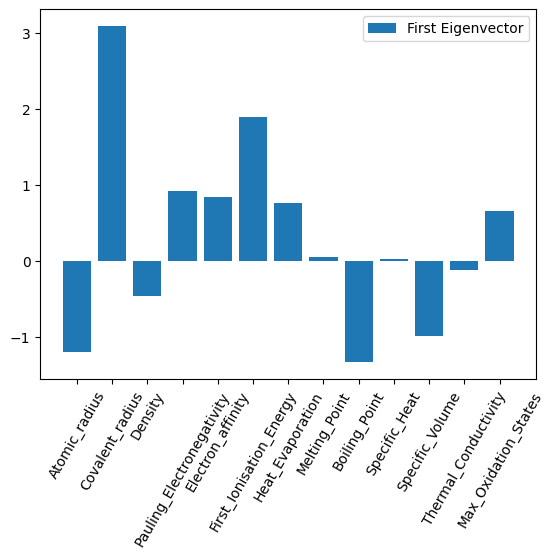

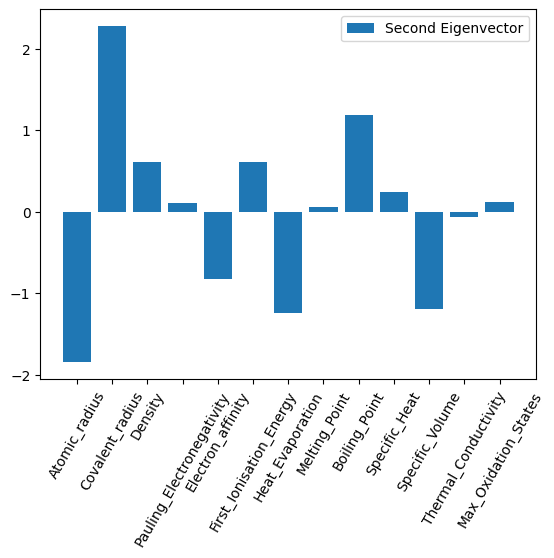

"\nplt.bar(labels, eigenvector_values[2, :], label='Second Eigenvector')\nplt.xticks(rotation=60)\nplt.legend()\nplt.show()\n"

In [60]:
eigenvector_values = lda.scalings_.T # lda.coef_

# Get the labels for the elements, which are the index values of the dataframe
labels = ['Atomic_radius', 'Covalent_radius','Density', 'Pauling_Electronegativity',
             'Electron_affinity', 'First_Ionisation_Energy', 'Heat_Evaporation',
             'Melting_Point', 'Boiling_Point', 'Specific_Heat', 'Specific_Volume',
             'Thermal_Conductivity', 'Max_Oxidation_States']

# Plot the first and second eigenvector as a bar plot
plt.bar(labels, eigenvector_values[0, :], label='First Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.bar(labels, eigenvector_values[1, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()

'''
plt.bar(labels, eigenvector_values[2, :], label='Second Eigenvector')
plt.xticks(rotation=60)
plt.legend()
plt.show()
'''

# LDA - Iris

Now, let's expriment with the Linear Discriminant Analysis (will be very similar for Quadratic DiscriminantAnalyysis, except that decision boundaries would no longer be linear). In the code below, we:
- Load Iris data set (note that here we use all 4 dimensions for each feature!)
- Perform the LDA analysis to project 4D feature space onto the 2D space in such a way as to separate the classes best
- Visualize the data set in this new coordinate system
- Visualize the mis-classified points

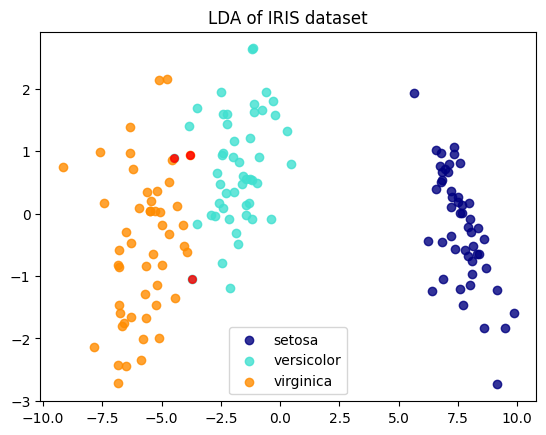

In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model and transform the data to LDA coordinates
X_lda_f = lda.fit(X, y)
X_lda = X_lda_f.transform(X)

# Plotting the data in LDA coordinates
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

# Get the indices of the points that are not predicted correctly
y_pred = X_lda_f.predict(X)
incorrect_indices = np.where(y_pred != y)[0]

# Plot circles around the points that are not predicted correctly
for index in incorrect_indices:
    plt.scatter(X_lda[index, 0], X_lda[index, 1], alpha=.8, s = 30, color='red', marker='o')

# Show the plot
plt.show()

Now, LDA gives access to some interesting outputs, including decision function. Let's visualize it.

In [62]:
X_lda_f.decision_function(X).shape

(150, 3)

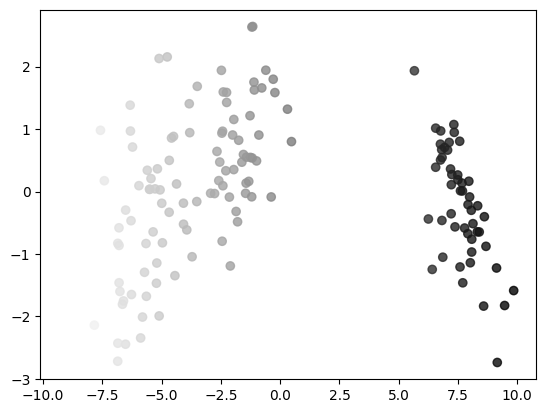

In [63]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=.8, c = X_lda_f.decision_function(X)[:,2], cmap = "gray")

Another thing we can do is to experiment with visualization of the decision boundaries for LDA.
- We can either extract the parameters of the Gaussian density that it creates, or simply apply it to some probing data set.
- However, our data set is 2D. So we create a probing array of N points uniformly distributes in the 4D space of original Iris data
- And calculate Kernel Density Estimate of decision class

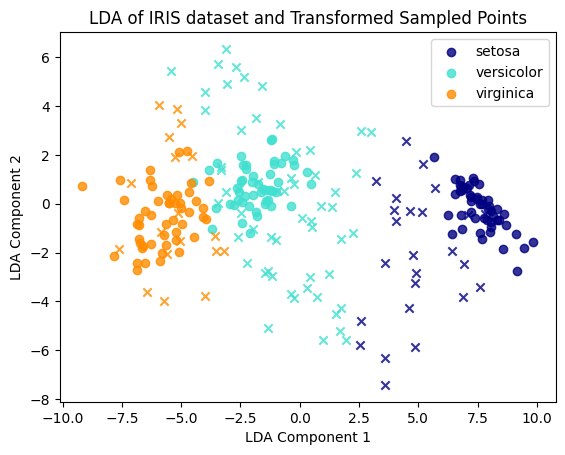

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Sample points in the 4D space
n_samples = 100
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Plot the LDA components of the original dataset
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)

# Plot the transformed sampled points in the LDA components space with their predicted class colors
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_sampled_lda[y_sampled_pred == i, 0], X_sampled_lda[y_sampled_pred == i, 1], alpha=.8, color=color, marker='x')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset and Transformed Sampled Points')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim', 'ylim'
  cset = contour_func(


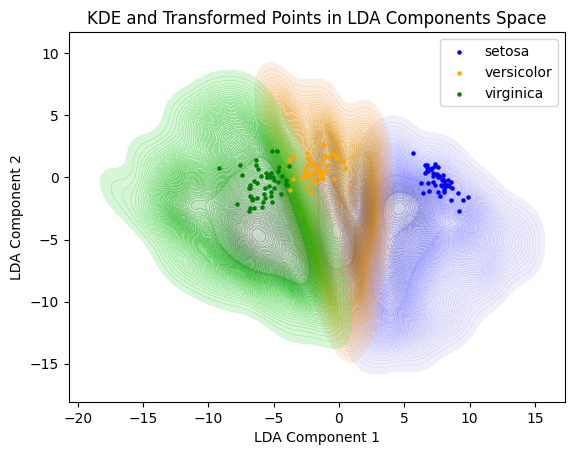

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the model
lda.fit(X, y)

# Transform the original data
X_lda = lda.transform(X)

# Sample points in the 4D space


new_min = X.min(axis=0) * 1.4
new_max = X.max(axis=0) * 1.4

# Sample points in the expanded 4D space
n_samples = 1000
X_sampled = np.random.rand(n_samples, 4) * (new_max - new_min) + new_min

'''
n_samples = 10000
X_sampled = np.random.rand(n_samples, 4) * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
'''

# Transform the sampled points to the LDA components
X_sampled_lda = lda.transform(X_sampled)

# Predict the class for each sampled point
y_sampled_pred = lda.predict(X_sampled)

# Determine the limits for the axes
x_min = min(X_lda[:, 0].min(), X_sampled_lda[:, 0].min())
x_max = max(X_lda[:, 0].max(), X_sampled_lda[:, 0].max())
y_min = min(X_lda[:, 1].min(), X_sampled_lda[:, 1].min())
y_max = max(X_lda[:, 1].max(), X_sampled_lda[:, 1].max())

# Plot the KDE of the transformed sampled points in the LDA components space with their predicted class colors
colors = ['blue', 'orange', 'green']
for color, i in zip(colors, [0, 1, 2]):
    sns.kdeplot(
        x=X_sampled_lda[y_sampled_pred == i, 0],
        y=X_sampled_lda[y_sampled_pred == i, 1],
        fill=True,
        color=color,
        thresh=0.01,
        levels=100,
        alpha=0.25,
        xlim=(x_min, x_max),
        ylim=(y_min, y_max)
    )

# Plot the transformed original dataset points on the KDE plot
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, label=target_name, s=5)

plt.title('KDE and Transformed Points in LDA Components Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()

# Show the plot
plt.show()